In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [56]:
eval_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Log/'
models = os.listdir(eval_dir)
print(models)

df_regions = pd.read_csv("~/Masters-Thesis/AttemptFour/TrainData/unique_regions_list.csv")

['subject_1_layer_norm', 'subject_2_baseline2', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subject_2_lstm_layer_norm', 'subject_2_layer_norm', 'subject_2_both_layer_norm']


In [57]:
def load_data(fname):
    with open(fname, "rb") as f:
        data = np.load(f)
    return np.squeeze(data, axis=-1)

In [58]:
data = {}
for i, m in enumerate(models):
    p = glob.glob(f"{eval_dir}/{m}/eval_out/attention_scores_*")
    if p != []:
        data[m] = load_data(p[0])

for k,v in data.items():
    print(k, v.shape)

subject_2_baseline2 (515, 15, 360)
subject_2_attn_layer_norm (515, 15, 360)
subject_2_dense_layer_norm (515, 15, 360)
subject_2_lstm_layer_norm (515, 15, 360)
subject_2_layer_norm (515, 15, 360)
subject_2_both_layer_norm (515, 15, 360)


In [59]:
def idx_to_region(idx: int):
    """
    idx: int [0, 360)
    """
    return df_regions.iloc[idx].regionLongName, df_regions.iloc[idx].regionName
idx_to_region(0)

('Primary_Visual_Cortex_L', 'V1_L')

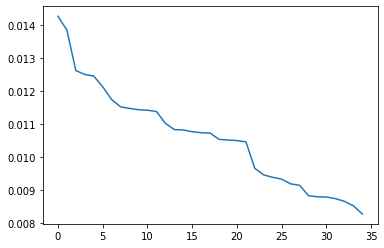

In [60]:
x1 = data['subject_2_both_layer_norm']
x1 = np.mean(x1, axis=(0,1))
x1_idx = np.argsort(x1)[::-1]
x1 = x1[x1_idx]
plt.plot(x1[:35])
plt.show()

In [61]:
for i in range(35):
    print(idx_to_region(x1_idx[i])[0])

Area_PGp_L
Area_TemporoParietoOccipital_Junction_3_L
Fusiform_Face_Complex_L
Area_TE2_posterior_R
Area_Lateral_Occipital_3_L
Eighth_Visual_Area_R
Seventh_Visual_Area_R
ParaHippocampal_Area_3_R
VentroMedial_Visual_Area_3_L
Middle_Temporal_Area_L
Fusiform_Face_Complex_R
Hippocampus_R
Area_PH_L
Medial_Superior_Temporal_Area_L
Area_TemporoParietoOccipital_Junction_2_L
Area_STGa_L
Ventral_Visual_Complex_R
VentroMedial_Visual_Area_3_R
ParaHippocampal_Area_2_R
Ventral_Visual_Complex_L
Area_TE1_anterior_L
ParaHippocampal_Area_1_L
Area_TE2_anterior_L
ParaHippocampal_Area_1_R
Area_47l_(47_lateral)_R
ParaHippocampal_Area_2_L
Area_TG_Ventral_L
Area_FST_L
Area_TF_L
Area_TE2_posterior_L
ParaHippocampal_Area_3_L
Area_V3A_R
VentroMedial_Visual_Area_2_L
Entorhinal_Cortex_R
Area_TemporoParietoOccipital_Junction_3_R


In [54]:
x = np.random.uniform(0, 1, (5, 4))
y = np.random.uniform(10, 11, (5, 4))
z = np.stack((x,y), axis=0)
print(z.shape)
print(z[0])
print(z[1])

(2, 5, 4)
[[0.25367979 0.02382048 0.33184536 0.40384555]
 [0.69657092 0.89883419 0.13869341 0.41282602]
 [0.74274405 0.2220609  0.71488733 0.37752014]
 [0.19415104 0.19043243 0.37469467 0.90564846]
 [0.8200625  0.97410926 0.56013497 0.342319  ]]
[[10.25879885 10.177274   10.21848779 10.8491522 ]
 [10.13658401 10.66826993 10.84697519 10.35503477]
 [10.26749805 10.51466823 10.53877324 10.21848767]
 [10.28406676 10.27211084 10.14913163 10.78301748]
 [10.22956474 10.91710034 10.55437369 10.03759856]]
